# Лабораторная 1

***План лабораторной;***

1. Постановка задачи обучения с учителем. Признаки объекта. Типы задач.
2. Классический k-NN. Взвешенный k-NN. k-NN в sсikit-learn. Ядра и метод потенциальных функций
3. Итоги

## 1.1 Постановка задачи обучения с учителем

Пусть 

* $X$ - множество объектов, или же, что более точно множество их информационных описаний
* $Y$ - множество ответов 
* $y: X \rightarrow Y$ - некоторая неизвестная зависимость

Задача ***обучения с учителем выглядит следующим образом*** 

***Дано:*** 

$ {x_1 ... x_l} \subset X $ - обучающая выборка 

$y_1 = y(x_1) ... y_l = y(x_l)$ - ответы

***Требуется найти:*** 

$a: X \rightarrow Y $ - алгоритм, приближающий $y$ на множестве $X$

## 1.2 Признаки объекта

Для того чтобы работать с объектами, алгоритм должен опираться на какие-то свойства объекта. Эти свойства и есть *признаки* объекта, а их множество является *признаковым описанием* объекта. 

Более срого ***признаки*** объекта $ f_j $ задаются следующим образом: 

$f_j : X \rightarrow D_j$ 

*Типы признаков*:

1. Бинарные (пример: наличие или отсутствие ванной комнаты у квартиры, наличие или отсутствие детей у пассажира титаника) 
2. Численные (пример: рост и вес человека, мощность двигателя машины) 
3. Категориальные (пример: день недели, погода) 

***Важно и очень важно*** понимать разницу между объектом и его признаковым описанием.

## 1.3 Типы задач

1. ***Задача бинарной классификации*** - $Y = \{0, 1\}$

Пример: вернёт ли клиент кредит, болен ли пациент. 

2. ***Задача классификации на M непересекающихся классов*** - $Y = \{0 ... M\}$

Пример: классификация рукописных цифр. 

3. ***Задача классификации на M пересекающихся классов*** - $Y = \{0, 1\}^M$

Пример: жанр для фильма(фильм может иметь несколько жанров). 

4. ***Задача регрессии*** - $Y = R$

Пример: время выполнения программы. 

5. ***Задача ранжирования*** - $Y$ - упорядоченное множество.

Пример: Поисковый запрос. 

### Задача 1(1 балл)

Загрузим датасет Ирисы Фишера. 

***Датасет ирисов Фишера*** впервые представлен британским статистиком и биологом Рональдом Фишером в 1936 году. Датасет состоит из измерений четырех признаков (длина наружной доли околоцветника, ширина наружной доли околоцветника, длина внутренней доли околоцветника, ширина внутренней доли околоцветника) и трех видов ирисов: setosa, versicolor и virginica.

Датасет содержит 150 экземпляров ирисов, по 50 для каждого вида. Ирисы Фишера часто используется для демонстрации методов классификации и кластеризации в машинном обучении, а также для иллюстрации визуализации данных и кластерного анализа.


In [ ]:
# библиотеки, используемые в лабораторной работе
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

: 

Визуализируем датасет 

In [ ]:
iris_dataset = sns.load_dataset('iris')
sns.pairplot(iris_dataset, hue='species')
plt.show()

: 

1. Сколько объектов в данном датасете?
2. Сколько признаков у каждого объекта?
3. Какие типы признаков у каждого объекта?
4. Какой тип задачи можно решить с помощью данного даного датасета?

1. В датасете Ирисы Фишера содержится 150 объектов.

2. У каждого объекта четыре признака, которые являются измерениями частей цветка: длина наружной дольки околоцветника (англ. sepal length), ширина наружной дольки околоцветника (англ. sepal width), длина внутренней дольки околоцветника (англ. petal length), и ширина внутренней дольки околоцветника (англ. petal width). Также в датасете присутствует метка класса, указывающая на вид ириса, к которому относится объект.

3. Все четыре признака у каждого объекта — это количественные (вещественные числа), измеряемые в сантиметрах.

4. Используя данный датасет, можно решать задачи классификации, при которых предсказывается вид ириса на основе измерений его частей цветка. Также его можно использовать для задачи кластеризации (например, для проверки алгоритмов, которые могли бы группировать наблюдения в три различные группы в соответствии с видами ирисов без предварительного знания их меток). Кроме того, данный датасет подходит для визуализации данных и обучения в области машинного обучения, так как он не очень большой и имеет четкую структуру.

## 2.1 Метрические методы классификации

***Гипотеза компактности***

Гипотеза компактности - это основная идея, лежащая в основе алгоритмов k-ближайших соседей (k-NN) в машинном обучении. Она предполагает, что объекты одного класса скорее всего находятся близко друг к другу в пространстве признаков. Другими словами, объекты, принадлежащие к одному классу, склонны иметь похожие значения признаков и, следовательно, будут расположены близко друг к другу в пространстве признаков.

***Гипотеза непрерывности***

Гипотеза непрерывности подразумевает, что объекты, находящиеся близко друг к другу в пространстве признаков, имеют близкие значения целевой переменной или принадлежат к одному и тому же классу. Это предположение позволяет алгоритмам классификации учитывать близость объектов при принятии решений о принадлежности к классу.

Посмотрите на выборку выше и убедитесь в выполнимости гипотезы непрерывности и компактности. 

***Алгоритм k-ближайших соседей (k-NN)*** является одним из простейших методов для классификации объектов в машинном обучении. Он основан на принципе гипотезы компактности и непрерывности: объекты одного класса склонны находиться близко друг к другу в пространстве признаков.

Фраза, которая хорошая объясняет работу алгоритма: ***"Скажи мне, кто твой друг, и я скажу, кто ты"***. Также стоит отметить, что метрические алгоритмы почти не имеют фазы обучения. Алгоритм просто запоминают всю обучающую выборку, а на этапе предсказания просто ищут похожие на целевой объекты. 

Такое обучение называется ***lazy learning***.  

***Принцип работы алгоритма k-NN***:

1. Загрузка обучающего набора данных, содержащего объекты и соответствующие им классы.
2. Для нового объекта вычисляется расстояние до всех объектов обучающего набора с использованием метрики расстояния, например, евклидово расстояние.
3. Выбираются k ближайших соседей нового объекта из обучающего набора данных.
4. Определяется класс нового объекта на основе классов его ближайших соседей (например, путем простого большинства среди соседей).
5. Новый объект относится к тому классу, который представлен большинством среди его k ближайших соседей.

Параметр k является гиперпараметром алгоритма, и его выбор влияет на точность классификации. Большие значения k могут быть более устойчивыми к выбросам, но более склонны к обобщению, в то время как малые значения k склонны к чувствительности к шумам, но могут иметь плохую предсказательную способность. 

Работа алгоритма хорошо продемонстрирована на схеме ниже:
1. У нас есть обучающая выборка из "синих квадратов" и "красных треугольников". Нам нужно понять к какому классу относится зелёный круг.
2. Для зелёного круга вычисляем расстояние до всех объектов обучающего набора. 
3. Выбираем k ближайших соседей зелёного круга(в нашем случае k = 3).
4. Определяется класс зелёного круга на основе классов его ближайших соседей (например, путем простого большинства среди соседей).
5. Зелёный круг относится к тому классу, который представлен большинством среди его k ближайших соседей(в нашем случае круг окажется треугольником). 

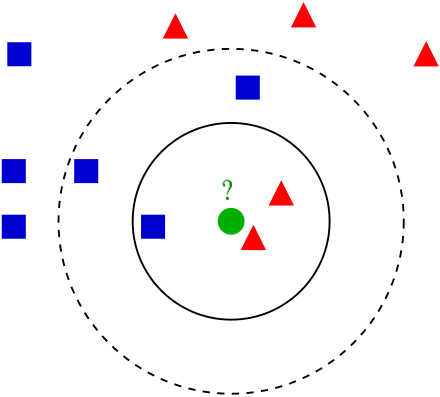

***Реализуем алгоритм k-nn своими руками***:

In [ ]:
np.bincount([1, 1, 2, 3, 0, 0, 0, 7, 7])

: 

In [ ]:
# Функция для вычисления евклидова расстояния между точками
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Класс, представляющий алгоритм k-NN
class KNN:
    def __init__(self, k=3):
        self.k = k

    # Метод для обучения модели
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    # Метод для предсказания класса нового объекта
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    # Внутренний метод для предсказания класса для одного объекта
    def _predict(self, x):
        # Вычисляем расстояние до всех объектов в обучающем наборе
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Сортируем по расстоянию и возвращаем индексы k ближайших соседей
        k_indices = np.argsort(distances)[:self.k]
        # Получаем метки классов ближайших соседей
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Возвращаем наиболее часто встречающийся класс
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

: 

In [ ]:
# Загрузим датасет ирисов
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Разделим на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

# Создадим и обучим модель k-NN
clf = KNN(k=3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# Оценим точность модели
accuracy = np.mean(predictions == y_test)
print(f"Точность: {accuracy}")

: 

### Задача2(1 балл)

1. Используя модель, приведённую выше, реализуйте k-nn с ***метрикой манхэттен***.
2. Постройте график зависимости точности алгоритма от числа соседей(k = 1, 2 ... 10).

In [ ]:
import numpy as np

# Функция для вычисления Манхэттенского расстояния между точками
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

# Класс, представляющий алгоритм k-NN с метрикой Манхэттен
class KNN:
    def __init__(self, k=3, distance_func=manhattan_distance):
        self.k = k
        self.distance_func = distance_func

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [self.distance_func(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common


: 

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Функция для вычисления Манхэттенского расстояния между точками
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

# Весь код здесь для класса KNN...

# Загрузим датасет ирисов
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Разделим на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

accuracies = []

# Проверим точность для разных значений k
for k in range(1, 11):
    # Создаем и обучаем модель k-NN с метрикой Манхэттен
    clf = KNN(k=k, distance_func=manhattan_distance)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    # Оценим точность модели
    accuracy = np.mean(predictions == y_test)
    accuracies.append(accuracy)
    
# Строим график зависимости точности от k
plt.plot(range(1, 11), accuracies, marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.show()


: 

## 2.2 Взвешенный k-nn 

У нашего алгоритма есть недостаток: он ***никак не учитывает*** расстояния до соседних объектов. Однако данная информация зачастую может быть важна. Этот недостаток устраняет взвешенный k-NN.

Принцип работы ***взвешенного алгоритма k-NN*** следующий:

1. Вычисление расстояния: для каждого объекта тестовой выборки вычисляются расстояния до всех объектов обучающей выборки (обычно используется евклидово расстояние, но могут быть использованы и другие метрики, такие как манхэттенское расстояние, косинусное расстояние и т. д.).

2. Нахождение k ближайших соседей: выбираются k обучающих объектов с наименьшими расстояниями до данного тестового объекта.

3. ***Присвоение весов***: каждому из ближайших соседей присваивается вес, который обратно пропорционален расстоянию до него. Чем меньше расстояние, тем больший вес получает сосед. Обычно используется функция, которая дает больший вес ближайшим соседям и меньший вес более отдаленным.

4. Прогнозирование класса: после вычисления весов каждого из соседей, для прогнозирования класса тестового объекта используется взвешенное голосование с учетом весов. То есть, каждый сосед голосует за свой класс, причем его голос взвешивается соответственно весу этого соседа. Итоговый класс определяется классом, получившим наибольшую сумму взвешенных голосов.

Рассмотрим пункт 3-4 более подробно. 

Пусть у нас имеется k ближайщих соседей. Самый близкий будет иметь номер 1, самый дальний номер k. Введём для каждого соседа вес - $w_i$, который зависит от номера соседа. 

При этом, наиболее распространённый выбор $w_i$:

* $w_i = \frac{k - i + 1}{k}$ - линейные веса 

* $w_i = q^i$, $0 < q < 1$ - экспоненциальные веса 

Тогда класс объекта $u$ будет вычисляться по формуле: $a(u) = argmax( \sum_{i = 1}^k w_i I(y_i = y))$

где $y_i$ - класс объекта $x_i$, а $I$ - функция принимающая значение 1 в случае верности тождества в скобках и 0 в других случаях.  

Таким образом нам нужно найти такое значение $y$ при котором выражение $a(u)$ будет максимальным. То есть теперь мы выбираем класс объекта не путем простого большинства среди соседей, а путем большинства среди соседей с ***некоторыми весами***. 

### Задача 3(2 балла)

1. Реализуйте взвешенный k-nn.  
2. Рассчитайте точность работы алгоритма. 

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Загружаем датасет
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Разделим на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

class KNN_Weighted:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Вычисляем расстояния от x до всех точек в обучающем наборе
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Получаем индексы отсортированных элементов (от меньшего к большему)
        k_indices = np.argsort(distances)[:self.k]

        # Получаем k ближайших меток
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Вычисляем веса для k ближайших соседей (обратно пропорциональные расстояниям)
        weights = [1 / distances[i] if distances[i] != 0 else float('inf') for i in k_indices]

        # Считаем взвешенную сумму меток для прогнозируемого значения
        label_weights = np.bincount(k_nearest_labels, weights=weights)

        # Возвращаем метку с наибольшим весом
        return np.argmax(label_weights)

# Обучение модели
k = 3 # Вы можете экспериментировать с разным числом k
clf_weighted = KNN_Weighted(k=k)
clf_weighted.fit(X_train, y_train)

# Предсказание меток для тестового набора данных
predictions_weighted = clf_weighted.predict(X_test)

# Точность модели
accuracy_weighted = np.mean(predictions_weighted == y_test)
print(f'Точность взвешенного KNN: {accuracy_weighted}')

: 

## 2.3 k-NN в sсikit-learn

Конечно же k-NN реализован в sсikit-learn и представлен классом `KNeighborsClassifier` в модуле `neighbors`. Вот основные гиперпараметры этого классификатора:

1. `n_neighbors`: Число соседей, которые используются для классификации каждого образца. Это, вероятно, самый важный гиперпараметр в классификаторе k-NN.

2. `weights`: Этот параметр позволяет задать веса, используемые для голосования среди соседей. Возможные значения:
- `uniform`: все соседи вносят одинаковый вклад в голосование.
- `distance`: вес каждого соседа зависит от расстояния, то есть ближайшие соседи имеют больший вес.

3. `p`: Параметр метрики расстояния. По умолчанию, p=2, что соответствует евклидовой метрике. Однако можно установить p=1, чтобы использовать манхэттенскую метрику.

4. `metric`: Метрика расстояния. По умолчанию используется метрика Минковского, которая имеет параметр p. Однако можно также указать другие метрики, такие как косинусное расстояние, Жаккарда и другие.

In [ ]:
# Загружаем датасет ирисах Фишера
iris = load_iris()
X = iris.data
y = iris.target

# Разделяем на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

# Создаем объект классификатора k-ближайших соседей
knn = KNeighborsClassifier(n_neighbors=5)

# Обучаем модель на обучающих данных
knn.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = knn.predict(X_test)

# Оцениваем точность модели
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели k-ближайших соседей на датасете:", accuracy)

: 

### Задача 4(2 балла)

1. Загрузите датасет 'breast_cancer' и отнормируйте данные.
2. Постройте графики зависимости точности алгоритма от числа ближайщих соседей(k = 1,2...10).
3. Найдите какое значение параметра weights даёт лучший результат при k = 5.
4. Найдите какое значение параметра metric даёт лучший результат при k = 5.
5. Найдите тройку k, weights, metric дающую лучшую точность. 

***Используйте разбиение X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)!***

Набор данных о раке груди, доступный в библиотеке scikit-learn, содержит информацию о различных признаках изображений, полученных с помощью цифровой маммографии. Эти признаки были извлечены из изображений и могут быть использованы для диагностики рака груди. Вот некоторые из ключевых признаков в этом наборе данных:

1. Радиус (среднее расстояние от центра до периферии)
2. Текстура (стандартное отклонение значений шкал серого цвета)
3. Площадь
4. Гладкость (локальные вариации по длине радиуса)
5. Периметр
6. Площадь

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Загружаем датасет о раке груди
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Нормирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разбиение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=22)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Список для хранения точности
accuracies = []

# Итерация по числу соседей от 1 до 10
for k in range(1, 11):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Построение графика
plt.plot(range(1, 11), accuracies, marker='o')
plt.xlabel('Число ближайших соседей (k)')
plt.ylabel('Точность')
plt.title('Зависимость точности от k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()
# Список для хранения точности для разных значений параметра weights
weights_options = ['uniform', 'distance']
best_weight_acc = 0
best_weight = ''

# Итерация по значениям параметра weights
for weight in weights_options:
    classifier = KNeighborsClassifier(n_neighbors=5, weights=weight)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_weight_acc:
        best_weight_acc = accuracy
        best_weight = weight

print(f'Лучшее значение weights: {best_weight} с точностью: {best_weight_acc}')
# Список для хранения точности для разных значений параметра metric
metrics_options = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
best_metric_acc = 0
best_metric = ''

# Итерация по значениям параметра metric
for metric in metrics_options:
    classifier = KNeighborsClassifier(n_neighbors=5, metric=metric)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_metric_acc:
        best_metric_acc = accuracy
        best_metric = metric

print(f'Лучшее значение metric: {best_metric} с точностью: {best_metric_acc}')
# Поиск лучшей тройки (k, weights, metric)
best_overall_acc = 0
best_overall_k = 0
best_overall_weight = ''
best_overall_metric = ''

for k in range(1, 11):
    for weight in weights_options:
        for metric in metrics_options:
            classifier = KNeighborsClassifier(n_neighbors=k, weights=weight, metric=metric)
            classifier.fit(X_train, y_train)
            y_pred = classifier.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_overall_acc:
                best_overall_acc = accuracy
                best_overall_k = k
                best_overall_weight = weight
                best_overall_metric = metric

print(f'Лучшее значение тройки (k, weights, metric): {best_overall_k}, {best_overall_weight}, {best_overall_metric} с точностью: {best_overall_acc}')


: 

### 2.4 Ядра и метод потенциальных функций

До сих пор мы использовали веса, зависящие от номера соседа, но напрямую не зависящие от расстояния до него.

Пусть есть объект $x$, который мы хотим классифицировать. Введём $w_i(x) = K(\frac{r(x_i,x)}{h})$, где r$(x_i,x)$ - расстояние между между $x$ и его i-соседом.  

$K(r)$ - ядро, не возрастает и положительно на $[0;1]$, h - ширина окна. 

На практике в качестве $К(r)$ используют:

* $K(r) = \frac{1}{2}I(|x| <= 1)$ - ***прямоугольное ядро***
* $K(r) = \frac{1}{\sqrt(2\pi))}e^{-2x^2}$ - ***гауссово ядро***

***Метод потенциальных функций***

Возьмём в качестве веса $w_i = q^i K(\frac{r(x_i, x)}{h_i})$. Здесь есть ***прямая аналогия с физикой***.

* $q^i$ - величина заряда в точке $x_i$
* $h_i$ - радиус действия потенциала с центром в точке $h$
* $K(r) = \frac{1}{r}$

### Задача 5(3 балла)

1. Реализуйте метод потенциальных функций для датасета, сгенерированого ниже. 
2. Веса может взять равными 1.
3. $h = 1$. 
4. $K(r) = \frac{1}{r}$.

In [ ]:
# Создание синтетического датасета
X, y = make_circles(n_samples=200, factor=0.9, noise=0.01, random_state=42)

# Визуализация датасета
plt.scatter(X[y==0, 0], X[y==0, 1], c='green', label='Класс 0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='skyblue', label='Класс 1')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

: 

In [ ]:
import numpy as np

# Классификатор метода потенциальных функций
class PotentialFunctionKNN:
    def __init__(self, k, potential_function):
        self.k = k
        self.potential_function = potential_function
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        # Веса равные 1
        self.weights = np.ones(len(y))

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Вычисляем потенциал для точки x относительно всех тренировочных точек
        potential = np.array([self.potential_function(x, x_train) for x_train in self.X_train])
        
        # Умножаем потенциалы на веса соответствующих точек
        weights_by_class = np.zeros(len(np.unique(self.y_train)))
        for i, w in enumerate(potential):
            weights_by_class[self.y_train[i]] += w * self.weights[i]
        
        return np.argmax(weights_by_class)

# Функция потенциала
def potential_function(x, x_train, h=1):
    r = np.sqrt(np.sum((x - x_train) ** 2))
    return 1 / (r / h) if r != 0 else float('inf')

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

# Создание экземпляра классификатора и применение к данным
k = 5  # Вы можете экспериментировать с различным числом k
clf = PotentialFunctionKNN(k=k, potential_function=potential_function)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Оценка точности
accuracy = np.mean(y_pred == y_test)
print(f'Точность классификатора метода потенциальных функций: {accuracy:.2f}')


: 

## 3. Итоги

Классификация k-ближайших соседей (k-NN) - это простой метод машинного обучения. Вот несколько его плюсов и минусов:

***Плюсы***:
1. Простота и интуитивная понятность: k-NN легко понять и реализовать. Он не имеет сложных гиперпараметров, обучение модели сводится к хранению обучающего набора данных.
2. Нет обучения: k-NN - ленивый алгоритм, что означает, что нет фазы обучения. Это позволяет быстро адаптироваться к новым данным.
3. Хорошо работает для простых задач: на небольших наборах данных с небольшим количеством признаков k-NN может дать неплохие результаты.

***Минусы***:
1. Высокие вычислительные затраты на предсказание: при больших объемах данных k-NN может быть медленным, так как для предсказания класса необходимо вычислить расстояние до всех обучающих примеров.
2. Чувствительность к выбору параметра k: выбор значения k (количества соседей) может сильно влиять на результаты классификации.
3. Неэффективен для данных с большим количеством признаков: при большом количестве признаков, особенно если они не нормализованы, алгоритм может работать менее эффективно из-за "проклятия размерности".
4. Нет понимания глубины признаков: k-NN не учитывает важность признаков и не выявляет глубинные закономерности в данных.

Несмотря на свои недостатки, k-NN может быть полезным методом в некоторых случаях, особенно при работе с небольшими объемами данных и простыми задачами.

### Задача 6(1 балл)

Приведите пример, когда метод k-NN может давать плохие результаты. Почему?

Метод k-NN может давать плохие результаты в следующих ситуациях:

1. Высокая размерность данных («проклятие размерности»): В пространствах с высокой размерностью точки могут оказаться равноудаленными друг от друга, что затрудняет идентификацию близких соседей. 
2. Неравномерное распределение классов: Если один класс имеет значительно больше примеров, чем другой, k-NN может быть смещён в сторону преобладающего класса.
3. Шумные данные и выбросы: k-NN очень чувствителен к шумным данным и выбросам, поскольку они могут сильно повлиять на расчет расстояния между точками.
4. Некорректно выбранное значение k: Слишком маленькое значение k может привести к переобучению, а слишком большое - к тому, что классификация будет основана на слишком обширном округе рассматриваемых точек.
5. Зависимые признаки: Если признаки высоко скоррелированы, может быть трудно выявить настоящие закономерности в данных.
6. Неправильно масштабированные признаки: Поскольку k-NN использует метрики расстояния для нахождения ближайших соседей, разный масштаб признаков может привести к доминированию некоторых признаков над другими. 

Во всех этих случаях подход k-NN может испытывать трудности с классификацией и, как результат, давать плохие результаты.